## Contents:
## Import libraries and set path
## Import current data
## Drop first_name and last_name from table - PII
## Create region for each state; compare to spending
### Lists to capture regions of each state
### Compare region_of_state with spending_flag
## Identify and remove customers with order count < 5
### Create subsets of data for high and low activity customers
## Create multiple customer profile variables
### Add new field: age_category
### Add new field: income_category
### Add new field: marital_dependents
## Profile visualizations
### Visualization - age_category profile
### Visualization - marital_dependents profile
### Visualization - income_category
### Visualization - region_of_state
### Visualization - department
## Aggregate max, mean, min variables on profile level for usage frequency and expenditure
### Age statistics (age_category)
### Marital dependents statistics (marital_dependents)
### Income statistics (income_category)
### Region statistics (region_of_state)
### Department statistics (department_id)

## Various crosstab comparisons (region and department) to identify relationships and visualizations
### Cross - Age (age_category) vs Region (region_of_state)
### Cross - Marital / Dependents (marital_dependent) vs Region (region_of_state)
### Cross - Income (income_category) vs Region (region_of_state)
### Cross - Region (region_of_state) vs Region (region_of_state)
### Cross - Department (department_id) vs Region (region_of_state)
### Cross - Age (age_category) vs Department (department_id)
### Cross - Marital / Dependents (marital_dependent) vs Department (department_id)
### Cross - Income (income_category) vs Department (department_id)
### Cross - Department (department_id) vs Department (department_id)
### Cross - Region (region_of_state) vs Department (department_id)
### Cross - Loyalty (loyalty_flag) and Age category (age_category)
### Cross - Loyalty (loyalty_flag) and Income category (income_category)
### Cross - Loyalty (loyalty_flag) and Marital / Dependents (marital_dependent)
### Cross - Loyalty (loyalty_flag) and Region (region_of_state)
## Export final data set
# -----------------------------------

### Import libraries and set path

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path for use in import
path = r'C:\Users\XLT2\CFProjects\2023-04-07 Instacart Basket Analysis'

### Step 1 - Import current data

In [3]:
# Import orders_products_w_full_customer_info.pkl
df_orders_products_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_w_full_customer_info.pkl'))

In [4]:
# Confirm good import
df_orders_products_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [6]:
# Confirm columns with PII info
df_orders_products_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   eval_set                object  
 8   order_number            int64   
 9   order_dow               int64   
 10  order_hour_of_day       int64   
 11  days_since_prior_order  float64 
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days_2          object  
 17  busiest_hours           object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_spend               float64 
 21  spendi

### Step 2 - Drop first_name and last_name from table - PII

In [5]:
# Drop first_name and last_name from df - PII
df_orders_products_customers = df_orders_products_customers.drop(columns = ['first_name', 'last_name'])

In [8]:
# Confirm columns first_name and last_name dropped successfully
df_orders_products_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   eval_set                object  
 8   order_number            int64   
 9   order_dow               int64   
 10  order_hour_of_day       int64   
 11  days_since_prior_order  float64 
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days_2          object  
 17  busiest_hours           object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_spend               float64 
 21  spendi

### Step 3 - Create region for each state; compare to spending

In [9]:
# Confirm states included to assure a match with the region designations
df_orders_products_customers['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

### Lists to capture regions of each state

In [6]:
# Variables to capture states in a region
# Source: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

# Region1 (Northeast)
region1 = [
    'Maine',
    'New Hampshire',
    'Vermont',
    'Massachusetts',
    'Rhode Island',
    'Connecticut',
    'New York',
    'Pennsylvania',
    'New Jersey'
]

# Region2 (Midwest)
region2 = [
    'Wisconsin',
    'Michigan',
    'Illinois',
    'Indiana',
    'Ohio',
    'North Dakota',
    'South Dakota',
    'Nebraska',
    'Kansas',
    'Minnesota',
    'Iowa',
    'Missouri'
]

# Region3 (South)
region3 = [
    'Delaware',
    'Maryland',
    'District of Columbia',
    'Virginia',
    'West Virginia',
    'North Carolina',
    'South Carolina',
    'Georgia',
    'Florida',
    'Kentucky',
    'Tennessee',
    'Mississippi',
    'Alabama',
    'Oklahoma',
    'Texas',
    'Arkansas',
    'Louisiana'
]

# Region4 (West)
region4 = [
    'Idaho',
    'Montana',
    'Wyoming',
    'Nevada',
    'Utah',
    'Colorado',
    'Arizona',
    'New Mexico',
    'Alaska',
    'Washington',
    'Oregon',
    'California',
    'Hawaii'
]

In [7]:
# FUNCTION: Test for and return region to add to df
def state_region(row):
    if row['state'] in region1:
        return 'Region1 (Northeast)'
    elif row['state'] in region2:
        return 'Region2 (Midwest)'
    elif row['state'] in region3:
        return 'Region3 (South)'
    elif row['state'] in region4:
        return 'Region4 (West)'
    else:
        return 'No region identified'

In [8]:
# Assign region values in new column 'region_of_state'
df_orders_products_customers['region_of_state'] = df_orders_products_customers.apply(state_region, axis = 1)

In [13]:
# Confirm add of column
df_orders_products_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,gender,state,age,date_joined,num_of_dependents,marital_status,income,_merge,region_of_state
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Region2 (Midwest)
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Region2 (Midwest)
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Region1 (Northeast)
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Region2 (Midwest)
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Region2 (Midwest)


In [14]:
# Confirm region values added
df_orders_products_customers['region_of_state'].value_counts(dropna = False)

Region3 (South)        10791885
Region4 (West)          8292913
Region2 (Midwest)       7597325
Region1 (Northeast)     5722736
Name: region_of_state, dtype: int64

In [15]:
# Confirm no rows added/dropped
df_orders_products_customers.shape

(32404859, 33)

### Compare region_of_state with spending_flag

In [16]:
# Create crosstab between 'region_of_state' and 'spending_flag'
region_spending_cross = pd.crosstab(df_orders_products_customers['region_of_state'], df_orders_products_customers['spending_flag'], dropna = False)

In [17]:
region_spending_cross

spending_flag,High spender,Low spender
region_of_state,,
Region1 (Northeast),108225,5614511
Region2 (Midwest),155975,7441350
Region3 (South),209691,10582194
Region4 (West),160354,8132559


In [18]:
# Copy region_spending to clipboard to paste to Excel
region_spending_cross.to_clipboard()

### Step 4 - Identify and remove customers with order count < 5

In [9]:
# FUNCTION: Test for and return customer activity to add to df
def cust_activity(row):
    if row['max_order'] >= 5:
        return 'High-activity customer'
    elif row['max_order'] < 5:
        return 'Low-activity customer'
    else:
        return 'No activity'

In [10]:
# Assign activity values in new column 'cust_activity'
df_orders_products_customers['cust_activity'] = df_orders_products_customers.apply(cust_activity, axis = 1)

In [21]:
df_orders_products_customers['cust_activity'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: cust_activity, dtype: int64

In [22]:
df_orders_products_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,gender,state,age,date_joined,num_of_dependents,marital_status,income,_merge,region_of_state,cust_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Region2 (Midwest),High-activity customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Region2 (Midwest),High-activity customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Female,Vermont,66,6/16/2018,2,married,158302,both,Region1 (Northeast),High-activity customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Region2 (Midwest),Low-activity customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Region2 (Midwest),Low-activity customer


#### Export full df for archive

In [23]:
# Export FULL orders_products_customer.pkl
df_orders_products_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_info_FULL_4_10_4.pkl'))

### Create subsets of data for high and low activity customers

In [24]:
# Create subset - low activity customers
df_ords_prods_low_act_cust = df_orders_products_customers[df_orders_products_customers['cust_activity'] == 'Low-activity customer']

In [11]:
# Create subset - high activity customers
df_ords_prods_high_act_cust = df_orders_products_customers[df_orders_products_customers['cust_activity'] == 'High-activity customer']

#### Verify all rows accounted for

In [26]:
# Confirm shape of full df
df_orders_products_customers.shape

(32404859, 34)

In [27]:
# Confirm shape of high activity cust df
df_ords_prods_high_act_cust.shape

(30964564, 34)

In [28]:
# Confirm shape of low activity cust df
df_ords_prods_low_act_cust.shape

(1440295, 34)

#### Export low activity customer df for archive

In [29]:
# Export low activity customers df.pkl
df_ords_prods_low_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_low_activity_customers_only.pkl'))

### Step 5 - Create multiple customer profile variables

### Add new field: age_category

In [30]:
# Adjust view to permit more rows to display
pd.set_option('display.max_rows', 500)

In [31]:
# Confirm age ranges of customers included
df_ords_prods_high_act_cust['age'].value_counts(dropna = False).sort_index(ascending = True)

18    478457
19    496077
20    480194
21    489116
22    490811
23    492931
24    487608
25    449324
26    489892
27    501071
28    464831
29    497291
30    486637
31    506218
32    474676
33    472331
34    484830
35    496510
36    460649
37    487618
38    492790
39    485248
40    483323
41    451269
42    485081
43    499729
44    494457
45    488088
46    472571
47    494052
48    506730
49    507879
50    468776
51    492218
52    480429
53    479004
54    497817
55    489733
56    499580
57    473657
58    479842
59    480715
60    461897
61    463615
62    473859
63    474757
64    504832
65    464710
66    454604
67    472533
68    501319
69    489495
70    480234
71    463515
72    479884
73    499453
74    477168
75    499229
76    477348
77    477999
78    471119
79    508337
80    492750
81    485847
Name: age, dtype: int64

In [32]:
# Adjust view to permit more rows to display
pd.set_option('display.max_rows', 10)

In [13]:
# Create new column as age_category
df_ords_prods_high_act_cust.loc[df_ords_prods_high_act_cust['age'] < 18, 'age_category'] = 'Child'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['age'] >= 18) & (df_ords_prods_high_act_cust['age'] < 40)), 'age_category'] = 'Younger adult'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['age'] >= 40) & (df_ords_prods_high_act_cust['age'] < 65)), 'age_category'] = 'Older adult'
df_ords_prods_high_act_cust.loc[df_ords_prods_high_act_cust['age'] >= 65, 'age_category'] = 'Retired adult'

In [35]:
# Check that age_category was added
df_ords_prods_high_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,state,age,date_joined,num_of_dependents,marital_status,income,_merge,region_of_state,cust_activity,age_category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Minnesota,81,8/1/2019,1,married,49620,both,Region2 (Midwest),High-activity customer,Retired adult
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Minnesota,81,8/1/2019,1,married,49620,both,Region2 (Midwest),High-activity customer,Retired adult
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Vermont,66,6/16/2018,2,married,158302,both,Region1 (Northeast),High-activity customer,Retired adult
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Hawaii,51,1/4/2019,2,married,57797,both,Region4 (West),High-activity customer,Older adult
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,Region3 (South),High-activity customer,Younger adult


In [36]:
# Confirm no null values created
df_ords_prods_high_act_cust['age_category'].value_counts(dropna = False)

Older adult      12103910
Younger adult    10665110
Retired adult     8195544
Name: age_category, dtype: int64

### Add new field: income_category

In [37]:
# Confirm income ranges in df
df_ords_prods_high_act_cust['income'].value_counts(dropna = False).sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 96069, dtype: int64

In [15]:
# Create new column as income_category
df_ords_prods_high_act_cust.loc[df_ords_prods_high_act_cust['income'] < 75000, 'income_category'] = 'Lower income'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['income'] >= 75000) & (df_ords_prods_high_act_cust['income'] < 200000)), 'income_category'] = 'Low Medium income'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['income'] >= 200000) & (df_ords_prods_high_act_cust['income'] < 400000)), 'income_category'] = 'High Medium income'
df_ords_prods_high_act_cust.loc[df_ords_prods_high_act_cust['income'] >= 400000, 'income_category'] = 'High income'

In [16]:
# Check that income_category was added
df_ords_prods_high_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,age,date_joined,num_of_dependents,marital_status,income,_merge,region_of_state,cust_activity,age_category,income_category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,81,8/1/2019,1,married,49620,both,Region2 (Midwest),High-activity customer,Retired adult,Lower income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,81,8/1/2019,1,married,49620,both,Region2 (Midwest),High-activity customer,Retired adult,Lower income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,66,6/16/2018,2,married,158302,both,Region1 (Northeast),High-activity customer,Retired adult,Low Medium income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,51,1/4/2019,2,married,57797,both,Region4 (West),High-activity customer,Older adult,Lower income
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,20,5/8/2019,3,living with parents and siblings,34171,both,Region3 (South),High-activity customer,Younger adult,Lower income


In [41]:
# Confirm no null values created
df_ords_prods_high_act_cust['income_category'].value_counts(dropna = False)

Low Medium income     20803742
Lower income           9906680
High Medium income      207146
High income              46996
Name: income_category, dtype: int64

In [42]:
# Assess existing fields for additional flags needed
df_ords_prods_high_act_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   eval_set                object  
 8   order_number            int64   
 9   order_dow               int64   
 10  order_hour_of_day       int64   
 11  days_since_prior_order  float64 
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days_2          object  
 17  busiest_hours           object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_spend               float64 
 21  spendi

In [43]:
# Confirm marital_status values for new flag
df_ords_prods_high_act_cust['marital_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

### Add new field: marital_dependents

In [18]:
# Create new column as marital_dependents
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['marital_status'] == 'married') & (df_ords_prods_high_act_cust['num_of_dependents'] == 0)), 'marital_dependents'] = 'Married no dependents'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['marital_status'] == 'married') & (df_ords_prods_high_act_cust['num_of_dependents'] > 0)), 'marital_dependents'] = 'Married with dependents'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['marital_status'] == 'single') & (df_ords_prods_high_act_cust['num_of_dependents'] == 0)), 'marital_dependents'] = 'Single no dependents'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['marital_status'] == 'single') & (df_ords_prods_high_act_cust['num_of_dependents'] > 0)), 'marital_dependents'] = 'Single with dependents'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['marital_status'] == 'divorced/widowed') & (df_ords_prods_high_act_cust['num_of_dependents'] == 0)), 'marital_dependents'] = 'Divorced/Widow no dependents'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['marital_status'] == 'divorced/widowed') & (df_ords_prods_high_act_cust['num_of_dependents'] > 0)), 'marital_dependents'] = 'Divorced/Widow with dependents'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['marital_status'] == 'living with parents and siblings') & (df_ords_prods_high_act_cust['num_of_dependents'] == 0)), 'marital_dependents'] = 'Friends/Siblings no dependents'
df_ords_prods_high_act_cust.loc[((df_ords_prods_high_act_cust['marital_status'] == 'living with parents and siblings') & (df_ords_prods_high_act_cust['num_of_dependents'] > 0)), 'marital_dependents'] = 'Friends/Siblings with dependents'

In [46]:
# Check that marital_dependents was added
df_ords_prods_high_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,date_joined,num_of_dependents,marital_status,income,_merge,region_of_state,cust_activity,age_category,income_category,marital_dependents
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,8/1/2019,1,married,49620,both,Region2 (Midwest),High-activity customer,Retired adult,Lower income,Married with dependents
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,8/1/2019,1,married,49620,both,Region2 (Midwest),High-activity customer,Retired adult,Lower income,Married with dependents
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,6/16/2018,2,married,158302,both,Region1 (Northeast),High-activity customer,Retired adult,Low Medium income,Married with dependents
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,1/4/2019,2,married,57797,both,Region4 (West),High-activity customer,Older adult,Lower income,Married with dependents
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,5/8/2019,3,living with parents and siblings,34171,both,Region3 (South),High-activity customer,Younger adult,Lower income,Friends/Siblings with dependents


In [47]:
# Confirm marital_dependents values for new flag
df_ords_prods_high_act_cust['marital_dependents'].value_counts(dropna = False)

Married with dependents             21743711
Single no dependents                 5094410
Divorced/Widow no dependents         2645271
Friends/Siblings with dependents     1481172
Name: marital_dependents, dtype: int64

### Step 6 - Profile visualizations

#### Visualization - age_category profile

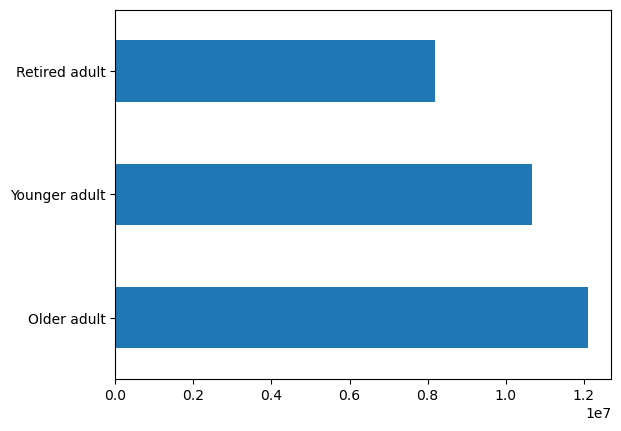

In [102]:
# Create bar chart
age_group_bar = df_ords_prods_high_act_cust['age_category'].value_counts(dropna = False).plot.barh(rot=0)

In [83]:
# Save bar chart as png
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_bar.png'))

#### Visualization - marital_dependents profile

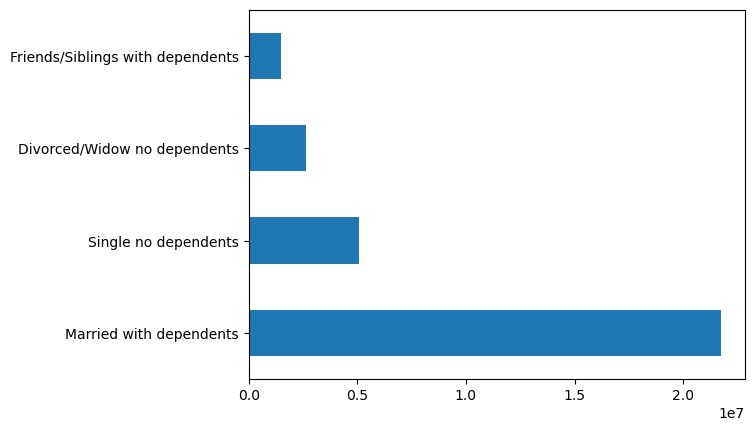

In [104]:
# Create bar chart
marital_dependents_bar = df_ords_prods_high_act_cust['marital_dependents'].value_counts(dropna = False).plot.barh()

In [52]:
# Save bar chart as png
marital_dependents_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_dependents_bar.png'))

#### Visualization - income_category

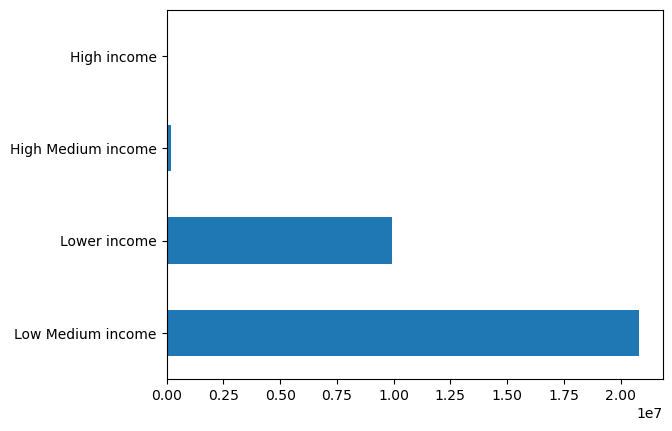

In [100]:
# Create bar chart
income_category_bar = df_ords_prods_high_act_cust['income_category'].value_counts(dropna = False).plot.barh(rot=0)

In [54]:
# Save bar chart as png
income_category_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_category_bar.png'))

#### Visualization - region_of_state

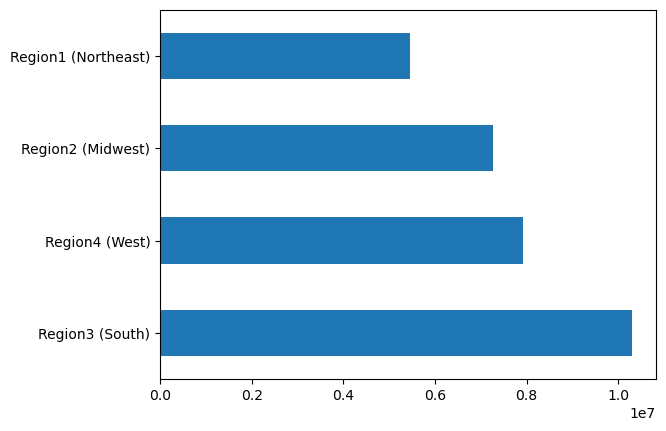

In [98]:
# Create bar chart
region_of_state_bar = df_ords_prods_high_act_cust['region_of_state'].value_counts(dropna = False).plot.barh(rot=0)

In [56]:
# Save bar chart as png
region_of_state_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_of_state_bar.png'))

#### Visualization - department

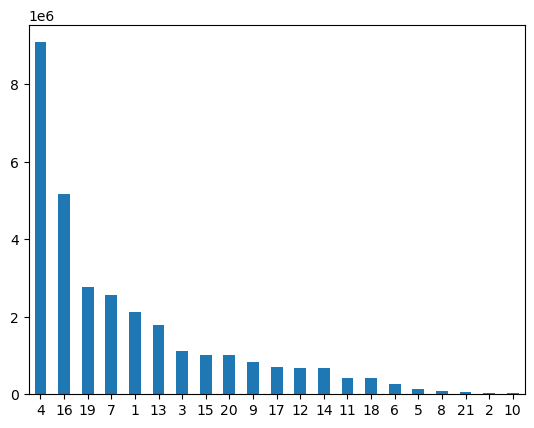

In [99]:
# Create bar chart
department_id_bar = df_ords_prods_high_act_cust['department_id'].value_counts(dropna = False).plot.bar(rot=0)

In [58]:
# Save bar chart as png
department_id_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_id_bar.png'))

### Step 7 - Aggregate max, mean, min variables on profile level for usage frequency and expenditure

### Age statistics (age_category)

In [59]:
# Age profile stats
age_profile_statistics = df_ords_prods_high_act_cust.groupby('age_category').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

In [60]:
age_profile_statistics

days_since_prior_order                prices              
                                mean   max  min       mean      max  min
age_category                                                            
Older adult                10.240627  30.0  0.0  11.944899  99999.0  1.0
Retired adult              10.211106  30.0  0.0  11.757768  99999.0  1.0
Younger adult              10.233375  30.0  0.0  12.055665  99999.0  1.0

In [99]:
# Copy age_profile_statistics to clipboard to paste to Excel
age_profile_statistics.to_clipboard()

### Marital dependents statistics (marital_dependents)

In [61]:
# Marital / dependents profile stats
marital_dependents_statistics = df_ords_prods_high_act_cust.groupby('marital_dependents').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

In [62]:
marital_dependents_statistics

days_since_prior_order                prices  \
                                                   mean   max  min       mean   
marital_dependents                                                              
Divorced/Widow no dependents                  10.176669  30.0  0.0  11.532741   
Friends/Siblings with dependents              10.181062  30.0  0.0  10.890167   
Married with dependents                       10.239629  30.0  0.0  11.944390   
Single no dependents                          10.232740  30.0  0.0  12.398586   

                                                
                                      max  min  
marital_dependents                              
Divorced/Widow no dependents      99999.0  1.0  
Friends/Siblings with dependents  99999.0  1.0  
Married with dependents           99999.0  1.0  
Single no dependents              99999.0  1.0

In [101]:
# Copy marital_dependents_statistics to clipboard to paste to Excel
marital_dependents_statistics.to_clipboard()

### Income statistics (income_category)

In [63]:
# Income profile stats
income_statistics = df_ords_prods_high_act_cust.groupby('income_category').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

In [64]:
income_statistics

days_since_prior_order                 prices              
                                     mean   max  min        mean      max  min
income_category                                                               
High Medium income               9.621624  30.0  0.0  261.895763  99999.0  1.0
High income                      9.821985  30.0  0.0  222.992836  99999.0  1.0
Low Medium income               10.201766  30.0  0.0   11.102297  99999.0  1.0
Lower income                    10.304933  30.0  0.0    7.451187  14900.0  1.0

In [103]:
# Copy income_statistics to clipboard to paste to Excel
income_statistics.to_clipboard()

### Region statistics (region_of_state)

In [65]:
# Region profile stats
region_statistics = df_ords_prods_high_act_cust.groupby('region_of_state').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

In [66]:
region_statistics

days_since_prior_order                prices              
                                      mean   max  min       mean      max  min
region_of_state                                                               
Region1 (Northeast)              10.198858  30.0  0.0  11.542582  99999.0  1.0
Region2 (Midwest)                10.303069  30.0  0.0  12.681835  99999.0  1.0
Region3 (South)                  10.232918  30.0  0.0  12.118845  99999.0  1.0
Region4 (West)                   10.181973  30.0  0.0  11.276491  99999.0  1.0

In [107]:
# Copy region_statistics to clipboard to paste to Excel
region_statistics.to_clipboard()

### Department statistics (department_id)

In [67]:
# Department profile stats
department_statistics = df_ords_prods_high_act_cust.groupby('department_id').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

In [68]:
department_statistics

days_since_prior_order               prices           
                                mean   max  min      mean   max  min
department_id                                                       
1                          10.739897  30.0  0.0  7.733725  15.0  1.0
2                          10.056842  30.0  0.0  6.961995  15.0  1.1
3                          10.227725  30.0  0.0  7.857482  15.0  1.0
4                          10.026070  30.0  0.0  7.980348  15.0  1.0
5                           9.331370  30.0  0.0  8.150699  15.0  1.0
...                              ...   ...  ...       ...   ...  ...
17                         10.968814  30.0  0.0  7.379951  15.0  1.0
18                          9.335526  30.0  0.0  7.634399  15.0  1.0
19                         10.108421  30.0  0.0  4.275555   7.0  1.6
20                         10.431782  30.0  0.0  7.783347  15.0  1.0
21                          9.659415  30.0  0.0  8.660655  15.0  1.0

[21 rows x 6 columns]

In [109]:
# Copy department_statistics to clipboard to paste to Excel
department_statistics.to_clipboard()

# ---------------------------------------

## Step 8 and 9 - Various crosstab comparisons (region and department) to identify relationships and visualizations

### Cross - Age (age_category) vs Region (region_of_state)

In [76]:
# Create a crosstab - 'age_category' and 'region', with column percentages
age_region_cross = pd.crosstab(df_ords_prods_high_act_cust['age_category'], df_ords_prods_high_act_cust['region_of_state'], normalize = 'columns')

In [70]:
age_region_cross

region_of_state,Region1 (Northeast),Region2 (Midwest),Region3 (South),Region4 (West)
age_category,,,,
Older adult,0.385775,0.395849,0.387390,0.394447
Retired adult,0.271710,0.262211,0.262673,0.264687
Younger adult,0.342515,0.341940,0.349937,0.340866


#### We can see spending by 'Retired adult' is lagging behind 'Older adult' (lagging by about 12%) and 'Younger adult' (lagging by about 8%) by a significant amount.
#### 'Younger adult' trails behind 'Older adult' by only about 4%.

In [112]:
# Copy age_region_cross to clipboard to paste to Excel
age_region_cross.to_clipboard()

### Age (age_category) vs Region (region_of_state) plot

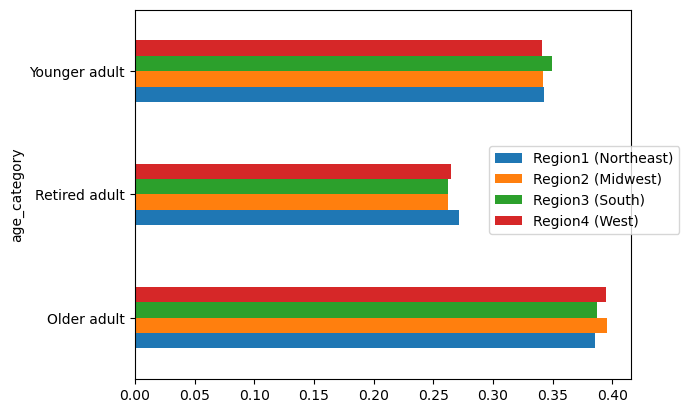

In [91]:
# age_profile by region
age_region_cross_bar = age_region_cross.plot.barh(rot=0)
plt.legend(bbox_to_anchor=(.7, .65), loc='upper left')

In [102]:
# Save bar chart as png
age_region_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_cross_bar.png'))

### Cross - Marital / Dependents (marital_dependent) vs Region (region_of_state)

In [96]:
# Create a crosstab - 'marital_dependents' and 'region', with column percentages
marital_dependent_region_cross = pd.crosstab(df_ords_prods_high_act_cust['marital_dependents'], df_ords_prods_high_act_cust['region_of_state'], normalize = 'columns')

In [97]:
marital_dependent_region_cross

region_of_state,Region1 (Northeast),Region2 (Midwest),Region3 (South),Region4 (West)
marital_dependents,,,,
Divorced/Widow no dependents,0.087611,0.084996,0.085084,0.084770
Friends/Siblings with dependents,0.046925,0.048397,0.049020,0.046403
Married with dependents,0.705214,0.700579,0.700577,0.703768
Single no dependents,0.160250,0.166028,0.165318,0.165059


#### 'Married with dependents' dominates by region at 70% followed by 'Single no dependents' with 16% of sales
#### Across regions, each category shows very little variance for each marital_dependents group.

In [131]:
# Copy marital_dependent_cross to clipboard to paste to Excel
marital_dependent_region_cross.to_clipboard()

### Marital / Dependents (marital_dependent) vs Region (region_of_state) plot

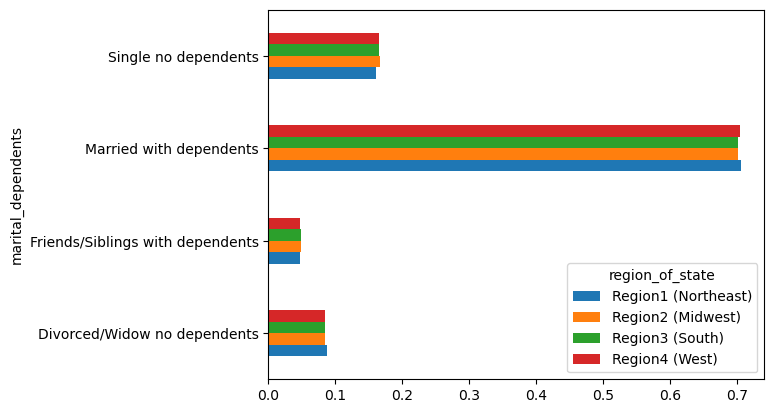

In [107]:
# Marital status / Dependents by region
marital_dependent_region_cross_bar = marital_dependent_region_cross.plot.barh(rot=0)

In [108]:
# Save bar chart as png
marital_dependent_region_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_dependent_region_cross_bar.png'))

### Cross - Income (income_category) vs Region (region_of_state)

In [98]:
# Create a crosstab - 'marital_dependents' and 'region', with column percentages
income_region_cross = pd.crosstab(df_ords_prods_high_act_cust['income_category'], df_ords_prods_high_act_cust['region_of_state'], normalize = 'columns')

In [99]:
income_region_cross

region_of_state,Region1 (Northeast),Region2 (Midwest),Region3 (South),Region4 (West)
income_category,,,,
High Medium income,0.006117,0.006570,0.006906,0.006913
High income,0.001222,0.002257,0.001187,0.001475
Low Medium income,0.676082,0.674362,0.670544,0.668355
Lower income,0.316579,0.316811,0.321363,0.323257


#### 'Low Medium income' (75k-200k) dominates our customer with 67% followed by 'Lower income' (<75k) with 32% of our customers
#### 'High income' (>400k) and 'High Medium income' (200k-400k) are not strongly represented in our customers

In [134]:
# Copy income_category_cross to clipboard to paste to Excel
income_region_cross.to_clipboard()

### Income (income_category) vs Region (region_of_state) plot

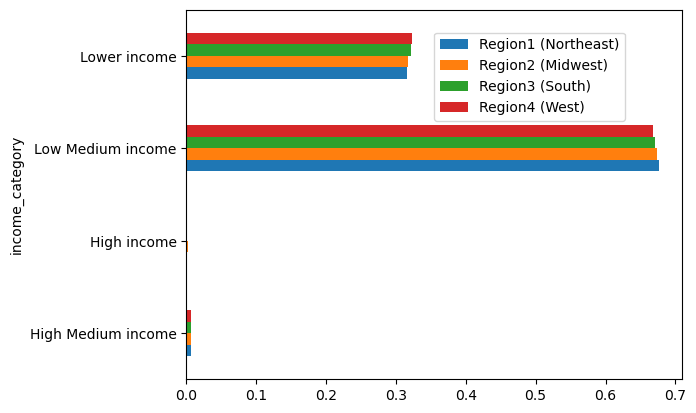

In [118]:
# Income by region
income_region_cross_bar = income_region_cross.plot.barh(rot=0)
plt.legend(loc=(0.5, 0.7))

In [119]:
# Save bar chart as png
income_region_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_cross_bar.png'))

### Cross - Region (region_of_state) vs Region (region_of_state)

#### Although region was a profile listed above, a cross with itself will yield no usable statistics so it will be omitted.

### Cross - Department (department_id) vs Region (region_of_state)

In [19]:
# Create a crosstab - 'department_id' and 'region', with column percentages
department_region_cross = pd.crosstab(df_ords_prods_high_act_cust['department_id'], df_ords_prods_high_act_cust['region_of_state'], normalize = 'columns')

In [93]:
# Adjust view to permit more rows to display
pd.set_option('display.max_rows', 500)

In [20]:
department_region_cross

region_of_state,Region1 (Northeast),Region2 (Midwest),Region3 (South),Region4 (West)
department_id,,,,
1,0.067787,0.068612,0.068848,0.068519
2,0.001147,0.001099,0.001123,0.001082
3,0.036471,0.036047,0.036041,0.036350
4,0.291509,0.293894,0.293612,0.293252
5,0.004578,0.004688,0.004734,0.004636
6,0.008176,0.008354,0.008209,0.008325
7,0.084713,0.082487,0.083349,0.082068
8,0.003245,0.002941,0.002901,0.003035
9,0.026318,0.026642,0.026458,0.026749


#### We see a relatively similar values across departments as well as across regions.
#### We have two products that deviate with a significant increase in volume over the other departments: Dept 4 (Product) @ 29% and Dept 16 (Dairy eggs) @ 17% are significantly higher than other products.

department_id -- department

1 	frozen

2 	other

3 	bakery

4 	produce

5 	alcohol

6 	international

7 	beverages

8 	pets

9 	dry goods pasta

10 	bulk

11 	personal care

12 	meat seafood

13 	pantry

14 	breakfast

15 	canned goods

16 	dairy eggs

17 	household

18 	babies

19 	snacks

20 	deli

21 	missing

In [141]:
# Copy department_cross to clipboard to paste to Excel
department_region_cross.to_clipboard()

### Department (department_id) vs Region (region_of_state) plot

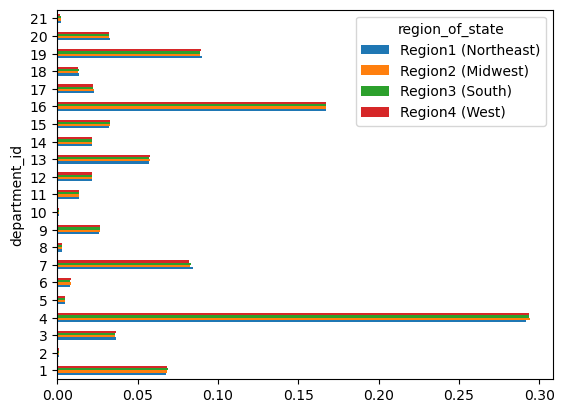

In [120]:
# Income by region
department_region_cross_bar = department_region_cross.plot.barh(rot=0)

In [121]:
# Save bar chart as png
department_region_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_region_cross_bar.png'))

In [95]:
# Adjust view to permit less rows to display
pd.set_option('display.max_rows', 10)

### Cross - Age (age_category) vs Department (department_id)

In [79]:
# Create a crosstab - 'age_category' and 'department_id', with column percentages
age_dept_cross = pd.crosstab(df_ords_prods_high_act_cust['age_category'], df_ords_prods_high_act_cust['department_id'], normalize = 'columns')

In [80]:
age_dept_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
age_category,,,,,,,,,,,,,,,,,,,,,
Older adult,0.391510,0.387870,0.391522,0.390154,0.389125,0.390428,0.394147,0.387137,0.390837,0.385101,...,0.389952,0.391630,0.392957,0.390138,0.389364,0.391683,0.396528,0.390243,0.391290,0.391459
Retired adult,0.265939,0.259975,0.264088,0.265231,0.253708,0.262505,0.265959,0.269880,0.264331,0.267406,...,0.268457,0.264981,0.261304,0.264318,0.264250,0.266669,0.258787,0.263356,0.264186,0.261163
Younger adult,0.342552,0.352155,0.344390,0.344615,0.357167,0.347067,0.339894,0.342983,0.344832,0.347493,...,0.341591,0.343389,0.345739,0.345544,0.346386,0.341648,0.344685,0.346401,0.344524,0.347378


#### We can see spending by 'Retired adult' is lagging behind 'Older adult' (lagging by about 12%) and 'Younger adult' (lagging by about 8%) by a significant amount.
#### 'Younger adult' trails behind 'Older adult' by only about 4%.

In [81]:
# Copy age_region_cross to clipboard to paste to Excel
age_dept_cross.to_clipboard()

### Age (age_category) vs Department (department_id) plot

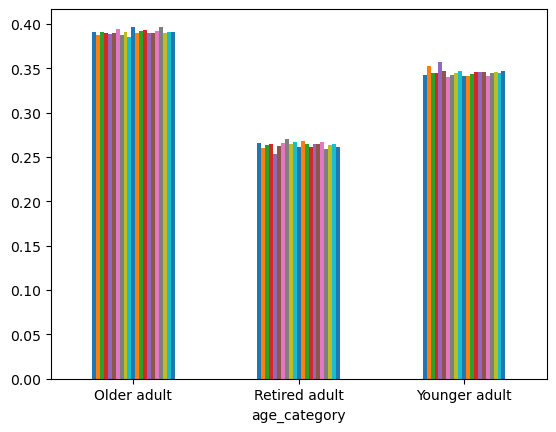

In [129]:
# age_profile by department
age_dept_cross_bar = age_dept_cross.plot.bar(rot=0, legend=None)

In [130]:
# Save bar chart as png
age_dept_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dept_cross_bar.png'))

### Cross - Marital / Dependents (marital_dependent) vs Department (department_id)

In [82]:
# Create a crosstab - 'marital_dependents' and 'region', with column percentages
marital_dependent_dept_cross = pd.crosstab(df_ords_prods_high_act_cust['marital_dependents'], df_ords_prods_high_act_cust['department_id'], normalize = 'columns')

In [83]:
marital_dependent_dept_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
marital_dependents,,,,,,,,,,,,,,,,,,,,,
Divorced/Widow no dependents,0.086701,0.082590,0.085415,0.085590,0.081997,0.085214,0.085882,0.086235,0.085449,0.079998,...,0.085392,0.085203,0.084356,0.083263,0.085491,0.083511,0.083703,0.085397,0.086418,0.078187
Friends/Siblings with dependents,0.048542,0.052745,0.047897,0.047420,0.057935,0.048416,0.046311,0.057361,0.048097,0.048818,...,0.047933,0.048154,0.049486,0.047899,0.048329,0.047651,0.047226,0.047466,0.047935,0.051214
Married with dependents,0.701969,0.694022,0.701043,0.701961,0.687430,0.699775,0.702769,0.689018,0.703409,0.712027,...,0.706242,0.702840,0.702422,0.704076,0.701656,0.707502,0.700996,0.702955,0.699651,0.702754
Single no dependents,0.162787,0.170643,0.165645,0.165029,0.172637,0.166596,0.165038,0.167387,0.163045,0.159158,...,0.160433,0.163803,0.163736,0.164763,0.164525,0.161336,0.168076,0.164182,0.165997,0.167845


#### 'Married with dependents' dominates by region at 70% followed by 'Single no dependents' with 16% of sales
#### Across regions, each category shows very little variance for each marital_dependents group.

In [84]:
# Copy marital_dependent_cross to clipboard to paste to Excel
marital_dependent_dept_cross.to_clipboard()

### Marital / Dependents (marital_dependent) vs Department (department_id) plot

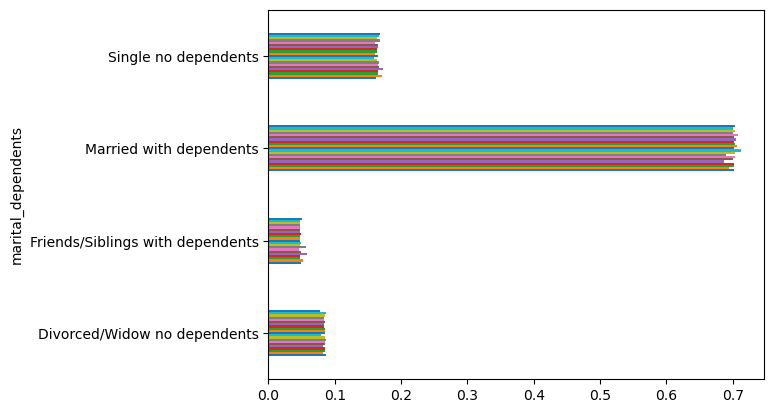

In [138]:
# Marital status / dependents by department
marital_dependent_dept_cross_bar = marital_dependent_dept_cross.plot.barh(rot=0, legend=None)

In [139]:
# Save bar chart as png
marital_dependent_dept_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_dependent_dept_cross_bar.png'))

### Cross - Income (income_category) vs Department (department_id)

In [85]:
# Create a crosstab - 'marital_dependents' and 'region', with column percentages
income_dept_cross = pd.crosstab(df_ords_prods_high_act_cust['income_category'], df_ords_prods_high_act_cust['department_id'], normalize = 'columns')

In [91]:
income_dept_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_category,,,,,,,,,,,,,,,,,,,,,
High Medium income,0.007826,0.011828,0.009403,0.004388,0.032311,0.006254,0.007859,0.015603,0.006713,0.000688,...,0.007511,0.007288,0.008131,0.007145,0.007019,0.013096,0.004159,0.006746,0.006033,0.004153
High income,0.001531,0.001860,0.001842,0.001052,0.010053,0.001703,0.001730,0.004631,0.001659,0.000120,...,0.001617,0.001618,0.001601,0.001836,0.001539,0.003374,0.000967,0.001550,0.001247,0.000741
Low Medium income,0.679547,0.668391,0.684096,0.688579,0.649422,0.694079,0.636047,0.677692,0.699984,0.642671,...,0.727549,0.686237,0.642859,0.699410,0.682268,0.653989,0.715177,0.582583,0.675123,0.673882
Lower income,0.311096,0.317922,0.304659,0.305980,0.308214,0.297964,0.354364,0.302074,0.291644,0.356521,...,0.263324,0.304858,0.347409,0.291609,0.309173,0.329542,0.279696,0.409120,0.317597,0.321223


#### 'Low Medium income' (75k-200k) dominates our customer with 67% followed by 'Lower income' (<75k) with 32% of our customers
#### 'High income' (>400k) and 'High Medium income' (200k-400k) are not strongly represented in our customers

In [87]:
# Copy income_category_cross to clipboard to paste to Excel
income_category_cross.to_clipboard()

### Income (income_category) vs Department (department_id) plot

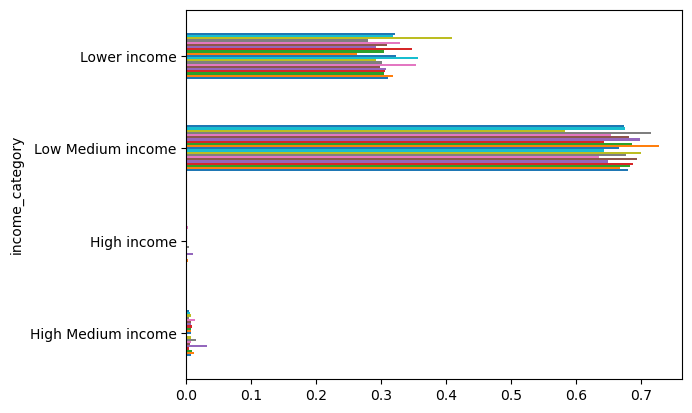

In [140]:
# Marital status / dependents by department
income_dept_cross_bar = income_dept_cross.plot.barh(rot=0, legend=None)

In [141]:
# Save bar chart as png
income_dept_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dept_cross_bar.png'))

### Cross - Department (department_id) vs Department (department_id)

#### Although department was a profile listed above, a cross with itself will yield no usable statistics so it will be omitted.

### Cross - Region (region_of_state) vs Department (department_id)

In [61]:
# Create a crosstab - 'marital_dependents' and 'region', with column percentages
region_dept_cross = pd.crosstab(df_ords_prods_high_act_cust['region_of_state'], df_ords_prods_high_act_cust['department_id'], normalize = 'columns')

In [62]:
region_dept_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region_of_state,,,,,,,,,,,,,,,,,,,,,
Region1 (Northeast),0.174591,0.182151,0.177815,0.175455,0.172976,0.174530,0.179995,0.190565,0.174931,0.167379,...,0.175718,0.175425,0.175753,0.174825,0.176663,0.178042,0.177177,0.178265,0.177717,0.177742
Region2 (Midwest),0.234820,0.231990,0.233535,0.235054,0.235385,0.236985,0.232893,0.229508,0.235318,0.237033,...,0.234535,0.235784,0.232772,0.234626,0.234199,0.238609,0.233292,0.233206,0.233568,0.240288
Region3 (South),0.334588,0.336491,0.331558,0.333449,0.337510,0.330672,0.334157,0.321395,0.331834,0.334220,...,0.332137,0.331942,0.332670,0.333432,0.332810,0.328726,0.339946,0.331397,0.332346,0.336385
Region4 (West),0.256000,0.249368,0.257091,0.256042,0.254130,0.257814,0.252955,0.258532,0.257917,0.261367,...,0.257610,0.256849,0.258805,0.257117,0.256329,0.254623,0.249586,0.257131,0.256369,0.245584


#### Sales across departments within each region remain relatively consistent
#### Sales across regions shows different activity
#### Region3 South ~ 34%
#### Region4 West and Region2 Midwest ~ 25%
#### Region1 Northeast ~ 17%

In [90]:
# Copy income_category_cross to clipboard to paste to Excel
region_dept_cross.to_clipboard()

### Region (region_of_state) vs Department (department_id) plot

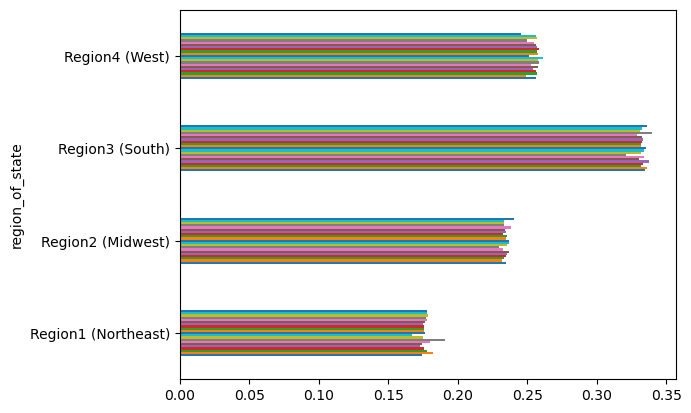

In [63]:
# Region by department
region_dept_cross_bar = region_dept_cross.plot.barh(rot=0, legend=None)

In [64]:
# Save bar chart as png
region_dept_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_dept_cross_bar.png'))

## Additional cross comparisons

### Cross - Loyalty (loyalty_flag) and Age category (age_category)

In [45]:
# Create a crosstab - 'loyalty' and 'age', with column percentages
loyalty_age_cross = pd.crosstab(df_ords_prods_high_act_cust['loyalty_flag'], df_ords_prods_high_act_cust['age_category'], normalize = 'columns')

In [35]:
loyalty_age_cross

age,18,19,20,21,22,23,24,25,26,27,...,72,73,74,75,76,77,78,79,80,81
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,0.318444,0.332015,0.310943,0.356267,0.362960,0.348925,0.313377,0.304611,0.318783,0.33522,...,0.322809,0.347040,0.321933,0.356073,0.307551,0.312291,0.315661,0.348946,0.361100,0.324034
New customer,0.160443,0.148263,0.158528,0.150750,0.147254,0.153821,0.161620,0.161979,0.154624,0.15219,...,0.157136,0.154567,0.159642,0.157172,0.153087,0.168249,0.155655,0.146590,0.144759,0.157255
Regular customer,0.521113,0.519722,0.530529,0.492983,0.489785,0.497254,0.525004,0.533410,0.526594,0.51259,...,0.520055,0.498393,0.518425,0.486755,0.539361,0.519459,0.528684,0.504465,0.494141,0.518711


### Loyalty (loyalty_flag) and Age (age)loyalty_age_cross plot

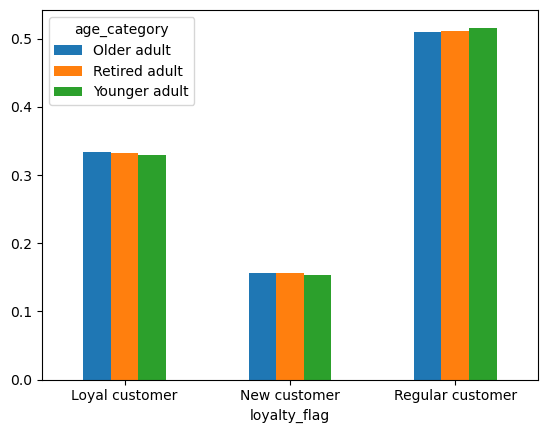

In [57]:
# loyalty by age
loyalty_age_cross_bar = loyalty_age_cross.plot.bar(rot=0)

In [58]:
# Save bar chart as png
loyalty_age_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_age_cross_bar.png'))

### Cross - Loyalty (loyalty_flag) and Income category (income_category)

In [42]:
# Create a crosstab - 'loyalty' and 'income', with column percentages
loyalty_income_cross = pd.crosstab(df_ords_prods_high_act_cust['loyalty_flag'], df_ords_prods_high_act_cust['income_category'], normalize = 'columns')

In [43]:
loyalty_income_cross

income_category,High Medium income,High income,Low Medium income,Lower income
loyalty_flag,,,,
Loyal customer,0.400457,0.351392,0.333898,0.326880
New customer,0.085365,0.081603,0.151395,0.164796
Regular customer,0.514178,0.567006,0.514707,0.508323


### Loyalty (loyalty_flag) and Income (income) plot

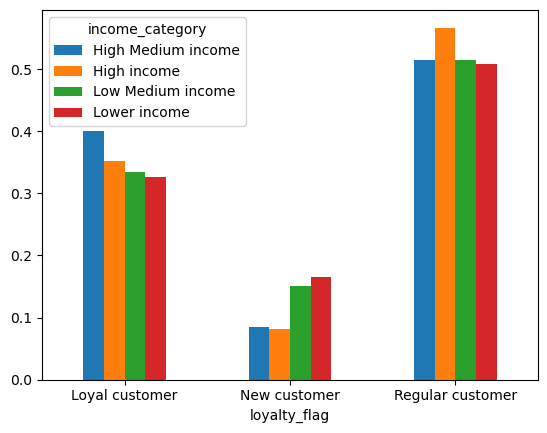

In [68]:
# loyalty by income
loyalty_income_cross_bar = loyalty_income_cross.plot.bar(rot=0)

In [51]:
# Save bar chart as png
loyalty_income_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_income_cross_bar.png'))

### Cross - Loyalty (loyalty_flag) and Marital / Dependents (marital_dependent)

In [70]:
# Create a crosstab - 'loyalty' and 'marital / dependents', with column percentages
loyalty_marital_dep_cross = pd.crosstab(df_ords_prods_high_act_cust['loyalty_flag'], df_ords_prods_high_act_cust['marital_dependents'], normalize = 'columns')

In [71]:
loyalty_marital_dep_cross

marital_dependents,Divorced/Widow no dependents,Friends/Siblings with dependents,Married with dependents,Single no dependents
loyalty_flag,,,,
Loyal customer,0.333698,0.332675,0.331245,0.334901
New customer,0.152643,0.149732,0.155477,0.156541
Regular customer,0.513659,0.517593,0.513278,0.508558


 ### Loyalty (loyalty_flag) and Marital / Dependents (marital_dependent) plot

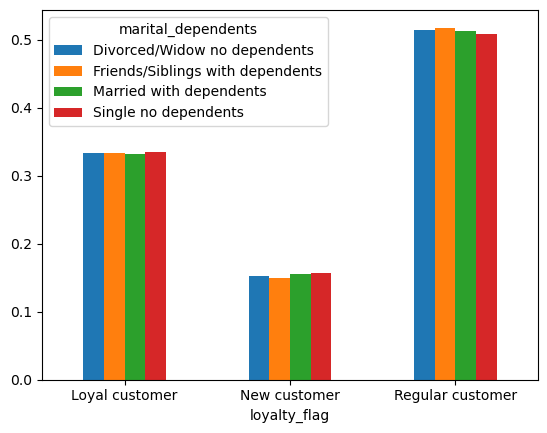

In [73]:
# loyalty by marital / dependents
loyalty_marital_dep_cross_bar = loyalty_marital_dep_cross.plot.bar(rot=0)

In [52]:
# Save bar chart as png
loyalty_marital_dep_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_marital_dep_cross_bar.png'))

### Cross - Loyalty (loyalty_flag) and Region (region_of_state)

In [28]:
# Create a crosstab - 'loyalty' and 'region', with column percentages
loyalty_region_cross = pd.crosstab(df_ords_prods_high_act_cust['loyalty_flag'], df_ords_prods_high_act_cust['region_of_state'], normalize = 'columns')

In [29]:
loyalty_region_cross

region_of_state,Region1 (Northeast),Region2 (Midwest),Region3 (South),Region4 (West)
loyalty_flag,,,,
Loyal customer,0.337034,0.326898,0.330307,0.335892
New customer,0.154109,0.156546,0.154558,0.155302
Regular customer,0.508857,0.516556,0.515135,0.508806


 ### Loyalty (loyalty_flag) and Region (region_of_state) plot

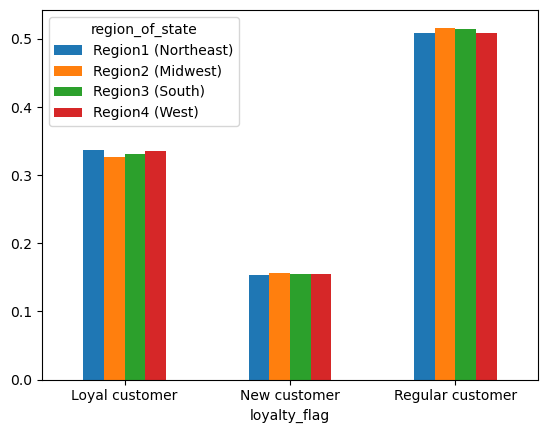

In [74]:
# loyalty by region
loyalty_region_cross_bar = loyalty_region_cross.plot.bar(rot=0)

In [54]:
# Save bar chart as png
loyalty_region_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_region_cross_bar.png'))

## Export final data set

In [144]:
# Export df_ords_prods_high_act_cust.pkl
df_ords_prods_high_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_high_act_cust_final.pkl'))